In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns

In [55]:
blobs=pd.read_csv('../DATA/cluster_blobs.csv')

In [56]:
blobs

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


<AxesSubplot:xlabel='X1', ylabel='X2'>

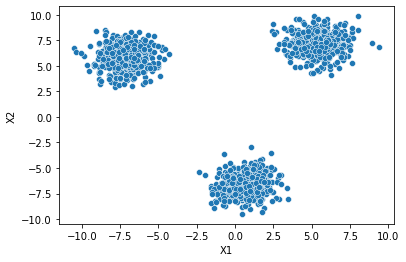

In [4]:
sns.scatterplot(data=blobs, x='X1', y='X2')

In [5]:
moons=pd.read_csv('../DATA/cluster_moons.csv')

In [6]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

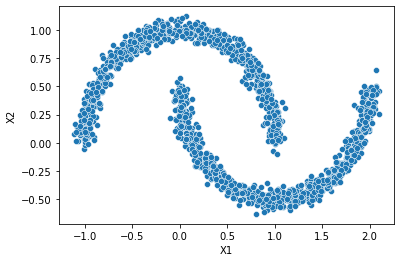

In [7]:
sns.scatterplot(data=moons, x='X1', y='X2')

In [8]:
circles=pd.read_csv('../DATA/cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

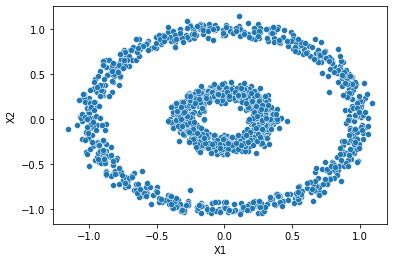

In [10]:
sns.scatterplot(data=circles, x='X1', y='X2')

In [11]:
def display_categories(model, data):
    labels=model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [12]:
from sklearn.cluster import KMeans

In [13]:
model=KMeans(n_clusters=3)

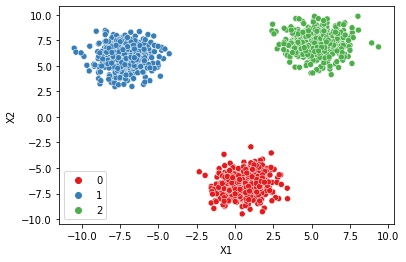

In [14]:
display_categories(model, blobs)

In [15]:
model=KMeans(n_clusters=2)

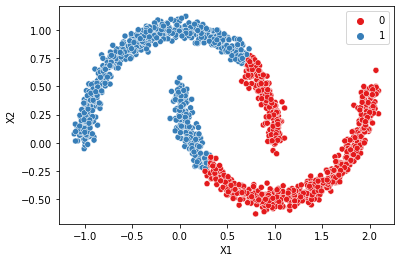

In [16]:
display_categories(model, moons)

In [21]:
model=KMeans(n_clusters=2)

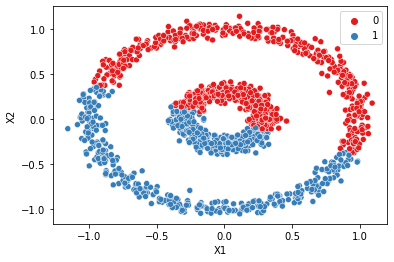

In [22]:
display_categories(model, circles)

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
model=DBSCAN()

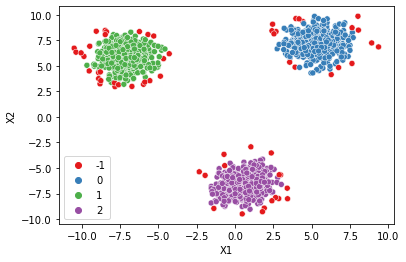

In [25]:
display_categories(model, blobs)

In [30]:
model=DBSCAN(eps=0.15)

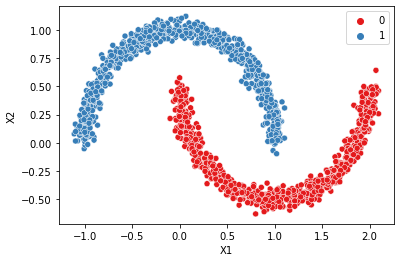

In [32]:
display_categories(model, moons)

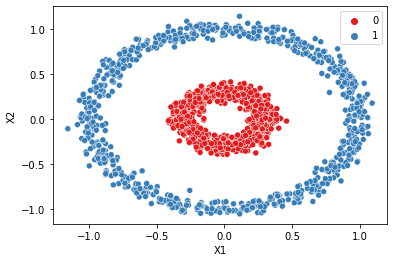

In [33]:
display_categories(model, circles)

In [62]:
two_blobs=pd.read_csv('../DATA/cluster_two_blobs.csv')     

In [63]:
two_blobs_outliers=pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

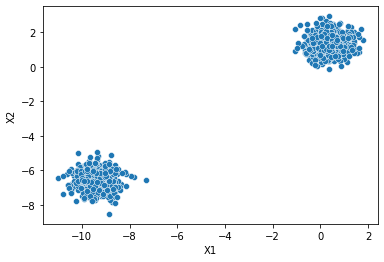

In [64]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

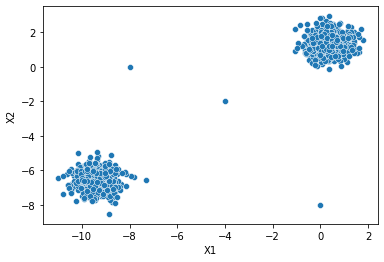

In [65]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [66]:
def display_categories(model, data):
    labels=model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [67]:
from sklearn.cluster import DBSCAN

In [68]:
dbscan=DBSCAN()

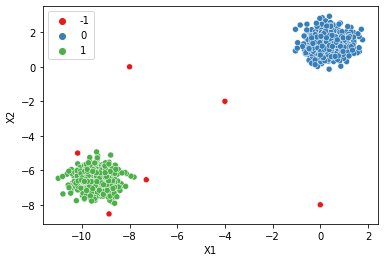

In [69]:
display_categories(dbscan,two_blobs_outliers)

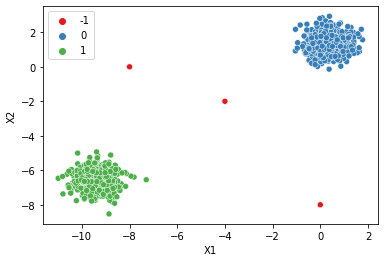

In [101]:
dbscan=DBSCAN(eps=0.70)
display_categories(dbscan,two_blobs_outliers)

In [49]:
np.sum(dbscan.labels_ == -1)

3

In [71]:
np.sum(dbscan.labels_ == -1)/len(dbscan.labels_) * 100

0.29910269192422734

In [89]:
outlier_percent=[]
noof_outlier=[]


for eps in np.linspace(0.001, 7, 200):
    
    dbscan=DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    noof_outlier.append(np.sum(dbscan.labels_ == -1))
    
    perc_outlier =100 * np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    outlier_percent.append(perc_outlier)

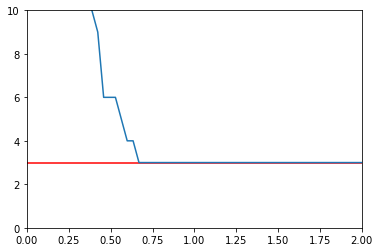

In [99]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=noof_outlier)
ply.xlim(0, 2)
ply.ylim(0,10)
ply.hlines(y=3, xmin=0, xmax=2, color='red')

In [103]:
outlier_percent=[]
noof_outlier=[]


for n in np.arange(1, 100):
    
    dbscan=DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    noof_outlier.append(np.sum(dbscan.labels_ == -1))
    
    perc_outlier =100 * np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    outlier_percent.append(perc_outlier)

<AxesSubplot:>

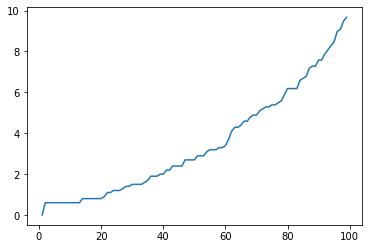

In [105]:
sns.lineplot(x=np.arange(1, 100), y=outlier_percent)